<a href="https://colab.research.google.com/github/habiib1999/Face-Recognition/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data read and Split [Abdul rahman Habib]

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import os, sys


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE = '/content/drive/MyDrive/att-database-of-faces/'
filepaths = [] # Contains the absolute paths of all the image files
for s_i in os.listdir(BASE): # The folders containing the files are labelled as s1, s2, etc
    if s_i != 'README': # There is also a README file present in the data, this must be ignored
        for filename in os.listdir(BASE + s_i):
            filepaths.append(BASE + s_i + '/' + filename)

In [ ]:
images = []
for filepath in filepaths:
    images.append(cv2.imread(filepath, 0).flatten())
images = np.array(images)

In [ ]:
labels = []
for i in range (40): #40 person
  for j in range(10): #images
    labels.append(i+1)
labels = np.array(labels)
print(labels)


[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
 27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
 29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
 32 32 32 32 32 32 32 32 33 33 33 33 33 33 33 33 33

In [ ]:
trainData = []
testData = []
trainLabels = []
testLabels = []
count = 0
for image,label in zip(images,labels):
  if count % 2 == 1:
    trainData.append(image)
    trainLabels.append(label)
  else:
    testData.append(image)
    testLabels.append(label)
  count += 1 
trainData = np.array(trainData) 
testData = np.array(testData)
trainLabels = np.array(trainLabels) 
testLabels = np.array(testLabels)

In [ ]:
for image in images:
  print(image)
  print("-------------------------------------------------------------------------------------------------")
for trainImg in trainData:
  print(trainImg)
for testImg in testData:
  print(testImg)   

[131 133 128 ...  54  53  56]
-------------------------------------------------------------------------------------------------
[130 133 129 ...  54  54  56]
-------------------------------------------------------------------------------------------------
[126 127 126 ...  87  85  89]
-------------------------------------------------------------------------------------------------
[128 128 128 ...  87  83  86]
-------------------------------------------------------------------------------------------------
[130 132 129 ...  53  50  52]
-------------------------------------------------------------------------------------------------
[124 125 125 ...  84  89  85]
-------------------------------------------------------------------------------------------------
[133 132 131 ...  53  48  58]
-------------------------------------------------------------------------------------------------
[132 127 128 ...  85  83  85]
--------------------------------------------------------------------------

# PCA [Ahmed Ashraf]

a. Use the pseudo code below for computing the projection matrix U. 
Define the alpha = {0.8,0.85,0.9,0.95}


In [ ]:
mean=np.array([np.mean(images, axis=0)])
mean

array([[85.6175, 85.5775, 85.925 , ..., 76.87  , 75.865 , 75.2275]])

In [ ]:
centered=images-mean
centered

array([[ 45.3825,  47.4225,  42.075 , ..., -22.87  , -22.865 , -19.2275],
       [ 44.3825,  47.4225,  43.075 , ..., -22.87  , -21.865 , -19.2275],
       [ 40.3825,  41.4225,  40.075 , ...,  10.13  ,   9.135 ,  13.7725],
       ...,
       [-40.6175, -33.5775, -37.925 , ..., -28.87  , -32.865 , -28.2275],
       [-32.6175, -27.5775, -28.925 , ..., -38.87  , -28.865 , -36.2275],
       [-33.6175, -29.5775, -25.925 , ..., -37.87  , -34.865 , -31.2275]])

In [ ]:
cov=np.cov(centered.T)
cov

array([[1283.65031955, 1271.88059524, 1266.10407268, ..., -153.3506015 ,
        -112.43522556,  -58.93531955],
       [1271.88059524, 1276.58044486, 1263.86296992, ..., -150.44854637,
        -110.82660401,  -58.63296366],
       [1266.10407268, 1263.86296992, 1267.87406015, ..., -148.6914787 ,
        -105.79461153,  -57.20093985],
       ...,
       [-153.3506015 , -150.44854637, -148.6914787 , ..., 2205.1760401 ,
        1934.52626566, 1786.40809524],
       [-112.43522556, -110.82660401, -105.79461153, ..., 1934.52626566,
        1978.60328321, 1841.77765664],
       [ -58.93531955,  -58.63296366,  -57.20093985, ..., 1786.40809524,
        1841.77765664, 1937.10350251]])

In [ ]:
from numpy import linalg 
w,v= np.linalg.eig(cov)
eigenvalues= np.array(w)
eigenvectors=np.array(v)
print("eigenvalues= \n",eigenvalues)
print("eigenvectors= \n",eigenvectors)

eigenvalues= 
 [ 2.82391006e+06+0.j  2.06973946e+06+0.j  1.09704614e+06+0.j ...
  4.71760653e-13+0.j -7.22245460e-13+0.j  6.05891897e-13+0.j]
eigenvectors= 
 [[-2.12507923e-03+0.j  1.46851506e-02+0.j  1.99294881e-02+0.j ...
   8.73953116e-04+0.j -3.51059218e-04+0.j  1.42229840e-03+0.j]
 [-2.11276614e-03+0.j  1.46139383e-02+0.j  2.00092007e-02+0.j ...
   2.54628866e-05+0.j -4.55513693e-05+0.j  1.19750434e-04+0.j]
 [-2.14250419e-03+0.j  1.46318643e-02+0.j  1.98385174e-02+0.j ...
   1.46582224e-05+0.j  9.49962685e-05+0.j  6.23131149e-05+0.j]
 ...
 [-7.04005567e-03+0.j -1.05610380e-02+0.j  1.41636829e-02+0.j ...
   1.50659716e-02+0.j -1.05181005e-03+0.j  7.95796882e-03+0.j]
 [-6.39096175e-03+0.j -9.70069545e-03+0.j  1.43943595e-02+0.j ...
  -4.51101682e-03+0.j  1.12710124e-02+0.j -9.28777630e-03+0.j]
 [-7.34479428e-03+0.j -8.81892481e-03+0.j  1.48748947e-02+0.j ...
   4.61964283e-03+0.j -6.96336124e-03+0.j  1.42742013e-02+0.j]]


In [ ]:
 # Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
print(f"Q3.g -> eigen pairs value & vector ordered:\n{eig_pairs}\n")

Streaming output truncated to the last 5000 lines.
       -7.02906743e-05+4.31605194e-05j, ...,
        2.99487301e-03+5.87206036e-03j,  1.20937539e-02-3.20590343e-03j,
       -3.78730509e-04-6.81002357e-03j])), (4.275537007805833e-12, array([-9.34129929e-05-3.63124813e-04j,  9.34892273e-05-3.04655973e-05j,
        4.05718315e-06+8.55967110e-05j, ...,
        1.02111456e-02+5.55314790e-03j,  2.99876542e-03+7.69731421e-03j,
       -4.58471092e-03-9.91786074e-03j])), (4.275537007805833e-12, array([-9.34129929e-05+3.63124813e-04j,  9.34892273e-05+3.04655973e-05j,
        4.05718315e-06-8.55967110e-05j, ...,
        1.02111456e-02-5.55314790e-03j,  2.99876542e-03-7.69731421e-03j,
       -4.58471092e-03+9.91786074e-03j])), (4.2744124801334905e-12, array([-8.39931942e-04+7.78292322e-04j, -1.25007972e-05+3.37349452e-05j,
       -3.49899582e-05+6.26975255e-05j, ...,
       -4.05141543e-03+9.99464919e-03j,  3.15237477e-04+6.49751506e-03j,
        4.34911377e-03-8.13574419e-03j])), (4.2744124801

In [ ]:
 # Q3.h
tot = sum(eigenvalues)
explainedVriance = [(i / tot)*100 for i in sorted(eigenvalues, reverse=True)]
print(f"Q3.h -> Explained variance:\n{explainedVriance}\n") #we will take pc1 and pc2

print(sum(explainedVriance))

Q3.h -> Explained variance:
[(17.609549780232594+0j), (12.90663627075459+0j), (6.841042453498393+0j), (5.57894284334859+0j), (5.109912685183252+0j), (3.36253366895176+0j), (2.447196749826954+0j), (2.331064364864165+0j), (1.9622021784230559+0j), (1.8027805384675215+0j), (1.438923424862767+0j), (1.3979224444748481+0j), (1.1190403195665086+0j), (1.0672741075801169+0j), (0.9746471624560237+0j), (0.9136254290709713+0j), (0.8760419529135461+0j), (0.8444523749274793+0j), (0.7354906393013471+0j), (0.6953673669735102+0j), (0.6709465761241029+0j), (0.6385096951392227+0j), (0.5930755393578477+0j), (0.54379663185422+0j), (0.5290913775924564+0j), (0.4935872330118425+0j), (0.4813320123099397+0j), (0.47888585461924527+0j), (0.4480262537908026+0j), (0.43614009224562367+0j), (0.42907558279169766+0j), (0.39916654438834936+0j), (0.39450116374860744+0j), (0.3803087568888785+0j), (0.36953627486679747+0j), (0.3503700944442163+0j), (0.3399971815239979+0j), (0.33642576099170995+0j), (0.31737927257224946+0j), 

In [ ]:
# Function that use ALPHA to calculate how many features will be used in the projection matrix
# and returns the projection matrix


def proj_matrix(a):
  a=a*100
  r=0
  sumx=0
  p=0
  w=0
  for w in explainedVriance:
    sumx= sumx+abs(w)
    r=r+1
    if sumx >= a:
      break

  f=0
  
  projection_matrix=np.empty((10304,0))

 

  
  for p in range(r+1):
    f=f+1
    temp = np.array(eig_pairs[p][1].reshape(10304,1) )
    projection_matrix = np.append(projection_matrix, temp, axis=1)  

                       
    
  print(r)

  
  return projection_matrix   


proj_matrix(0.8).shape  

44


(10304, 45)

In [ ]:
projection_matrix_1=proj_matrix(0.8)
projection_matrix_2=proj_matrix(0.85)
projection_matrix_3=proj_matrix(0.9)
projection_matrix_4=proj_matrix(0.95)



# Alpha 1 =0.8
train_alpha_1_proj = trainData.dot(projection_matrix_1)
train_alpha_1_proj = np.nan_to_num(train_alpha_1_proj.real)

test_alpha_1_proj = testData.dot(projection_matrix_1)
test_alpha_1_proj = np.nan_to_num(test_alpha_1_proj.real)



#Alpha 2 = 0.85
train_alpha_2_proj = trainData.dot(projection_matrix_2)
train_alpha_2_proj = np.nan_to_num(train_alpha_2_proj.real)

test_alpha_2_proj = testData.dot(projection_matrix_2)
test_alpha_2_proj = np.nan_to_num(test_alpha_2_proj.real)


#Alpha 3 = 0.9
train_alpha_3_proj = trainData.dot(projection_matrix_3)
train_alpha_3_proj = np.nan_to_num(train_alpha_3_proj.real)

test_alpha_3_proj = testData.dot(projection_matrix_3)
test_alpha_3_proj = np.nan_to_num(test_alpha_3_proj.real)


#Alpha 4 = 0.95
train_alpha_4_proj = trainData.dot(projection_matrix_4)
train_alpha_4_proj = np.nan_to_num(train_alpha_4_proj.real)

test_alpha_4_proj = testData.dot(projection_matrix_4)
test_alpha_4_proj = np.nan_to_num(test_alpha_4_proj.real)

#train_alpha_2_proj = trainData.dot(projection_matrix_2)
#test_alpha_2_proj = testData.dot(projection_matrix_2)

#train_alpha_3_proj = trainData.dot(projection_matrix_3)
#test_alpha_3_proj = testData.dot(projection_matrix_3)

#train_alpha_4_proj = trainData.dot(projection_matrix_4)
#test_alpha_4_proj = testData.dot(projection_matrix_4)

print(train_alpha_1_proj)
print(test_alpha_1_proj)

44
68
111
190
[[ 8886.52260666  6927.08340238  1453.57122264 ...   302.67606797
   -238.88263776  -155.82999863]
 [ 9551.35808916  8434.32265956   675.41039688 ...   413.62185448
   -150.8388322     38.72690058]
 [ 9722.83243938  8552.5319053    191.37318103 ...   124.65765772
   -300.30571999    90.97717693]
 ...
 [ 7175.73170391  8531.63020321 -1985.69846179 ...   121.53313684
   -518.00643852  -156.28811343]
 [ 6971.01152553  8582.89107051 -1931.58581792 ...    76.08282115
   -434.40418707  -142.41002917]
 [ 8570.99209084  7292.19511606 -1858.92682994 ...   297.44077294
   -651.33902036   181.60184836]]
[[ 9086.32489314  6907.06954041  1352.24924358 ...   407.40630584
   -327.58269204   -59.40808258]
 [ 9227.08163018  8676.5884704    503.56689222 ...   260.36755968
   -263.01426091   370.89130546]
 [ 9085.01350829  7275.21499527  1052.31729721 ...   -46.57559684
   -391.04497685   -42.0406794 ]
 ...
 [ 7111.17142505  7687.11358435 -1444.80313124 ...    99.07468622
   -610.91276056  

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()


scaler.fit(train_alpha_1_proj)
X_train_1 = scaler.transform(train_alpha_1_proj)
X_test_1 = scaler.transform(test_alpha_1_proj)

scaler.fit(train_alpha_2_proj)
X_train_2 = scaler.transform(train_alpha_2_proj)
X_test_2 = scaler.transform(test_alpha_2_proj)


scaler.fit(train_alpha_3_proj)
X_train_3 = scaler.transform(train_alpha_3_proj)
X_test_3 = scaler.transform(test_alpha_3_proj)

scaler.fit(train_alpha_4_proj)
X_train_4 = scaler.transform(train_alpha_4_proj)
X_test_4 = scaler.transform(test_alpha_4_proj)




def k_neighbours(k,x_train,x_test):
   
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier.fit(x_train, trainLabels)
  pred = classifier.predict(x_test)
  return   pred
 
# Alpha 1 = 0.8 ------- k=1,3,5,7
pred_1_k1= k_neighbours(1,X_train_1,X_test_1)
pred_1_k3= k_neighbours(3,X_train_1,X_test_1)
pred_1_k5= k_neighbours(5,X_train_1,X_test_1)
pred_1_k7= k_neighbours(7,X_train_1,X_test_1)



# Alpha 2 = 0.85 ------- k=1,3,5,7
pred_2_k1= k_neighbours(1,X_train_2,X_test_2)
pred_2_k3= k_neighbours(3,X_train_2,X_test_2)
pred_2_k5= k_neighbours(5,X_train_2,X_test_2)
pred_2_k7= k_neighbours(7,X_train_2,X_test_2)




# Alpha 3 = 0.9 ------- k=1,3,5,7
pred_3_k1= k_neighbours(1,X_train_3,X_test_3)
pred_3_k3= k_neighbours(3,X_train_3,X_test_3)
pred_3_k5= k_neighbours(5,X_train_3,X_test_3)
pred_3_k7= k_neighbours(7,X_train_3,X_test_3)



# Alpha 4 = 0.95 ------- k=1,3,5,7
pred_4_k1= k_neighbours(1,X_train_4,X_test_4)
pred_4_k3= k_neighbours(3,X_train_4,X_test_4)
pred_4_k5= k_neighbours(5,X_train_4,X_test_4)
pred_4_k7= k_neighbours(7,X_train_4,X_test_4)


"""
classifier_1 = KNeighborsClassifier(n_neighbors=1)
classifier_1.fit(X_train_1, trainLabels)
pred_1 = classifier_1.predict(X_test_1)
pred_1


classifier_2 = KNeighborsClassifier(n_neighbors=1)
classifier_2.fit(X_train_2, trainLabels)
pred_2 = classifier_2.predict(X_test_2)
pred_2



classifier_3 = KNeighborsClassifier(n_neighbors=1)
classifier_3.fit(X_train_3, trainLabels)
pred_3 = classifier_3.predict(X_test_3)
pred_3


classifier_4 = KNeighborsClassifier(n_neighbors=1)
classifier_4.fit(X_train_4, trainLabels)
pred_4 = classifier_4.predict(X_test_4)

print(pred_1)
print(k_neighbours(1,X_train_1,X_test_1))
"""




'\nclassifier_1 = KNeighborsClassifier(n_neighbors=1)\nclassifier_1.fit(X_train_1, trainLabels)\npred_1 = classifier_1.predict(X_test_1)\npred_1\n\n\nclassifier_2 = KNeighborsClassifier(n_neighbors=1)\nclassifier_2.fit(X_train_2, trainLabels)\npred_2 = classifier_2.predict(X_test_2)\npred_2\n\n\n\nclassifier_3 = KNeighborsClassifier(n_neighbors=1)\nclassifier_3.fit(X_train_3, trainLabels)\npred_3 = classifier_3.predict(X_test_3)\npred_3\n\n\nclassifier_4 = KNeighborsClassifier(n_neighbors=1)\nclassifier_4.fit(X_train_4, trainLabels)\npred_4 = classifier_4.predict(X_test_4)\n\nprint(pred_1)\nprint(k_neighbours(1,X_train_1,X_test_1))\n'

In [ ]:
from sklearn.metrics import accuracy_score

#  k = 1
acc_1_k1 = accuracy_score(testLabels, pred_1_k1)
acc_2_k1 = accuracy_score(testLabels, pred_2_k1)
acc_3_k1 = accuracy_score(testLabels, pred_3_k1)
acc_4_k1 = accuracy_score(testLabels, pred_4_k1)

#  k = 3
acc_1_k3 = accuracy_score(testLabels, pred_1_k3)
acc_2_k3 = accuracy_score(testLabels, pred_2_k3)
acc_3_k3 = accuracy_score(testLabels, pred_3_k3)
acc_4_k3 = accuracy_score(testLabels, pred_4_k3)

#  k = 5
acc_1_k5 = accuracy_score(testLabels, pred_1_k5)
acc_2_k5 = accuracy_score(testLabels, pred_2_k5)
acc_3_k5 = accuracy_score(testLabels, pred_3_k5)
acc_4_k5 = accuracy_score(testLabels, pred_4_k5)


#  k = 7
acc_1_k7 = accuracy_score(testLabels, pred_1_k7)
acc_2_k7 = accuracy_score(testLabels, pred_2_k7)
acc_3_k7 = accuracy_score(testLabels, pred_3_k7)
acc_4_k7 = accuracy_score(testLabels, pred_4_k7)



print('accuracy of aplpha 1 k1  = ', acc_1_k1)
print('accuracy of aplpha 2 k1  = ', acc_2_k1)
print('accuracy of aplpha 3 k1  = ', acc_3_k1)
print('accuracy of aplpha 4 k1  = ', acc_4_k1)

accuracy of aplpha 1 k1  =  0.895
accuracy of aplpha 2 k1  =  0.845
accuracy of aplpha 3 k1  =  0.73
accuracy of aplpha 4 k1  =  0.47


# **Plotting diffrent Values of Aplpha with different values of k neighbours**

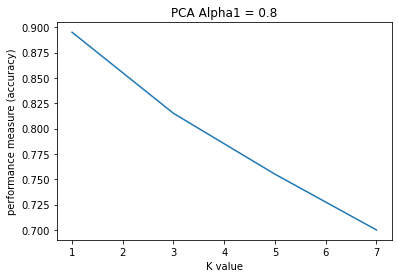

In [ ]:
# Plot the performance measure against the K value
import matplotlib.pyplot as plt
  
# x axis values
x = [1,3,5,7]

# corresponding y axis values
y1 = [acc_1_k1,acc_1_k3,acc_1_k5,acc_1_k7]
y2 = [acc_2_k1,acc_2_k3,acc_2_k5,acc_2_k7]
y3 = [acc_3_k1,acc_3_k3,acc_3_k5,acc_3_k7]
y4 = [acc_4_k1,acc_4_k3,acc_4_k5,acc_4_k7]

# plotting the points 
plt.plot(x, y1)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.8')
  
# function to show the plot
plt.show()


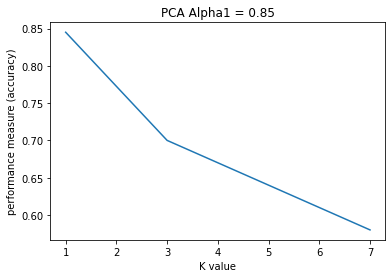

In [ ]:

# plotting the points 
plt.plot(x, y2)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.85')
  
# function to show the plot
plt.show()

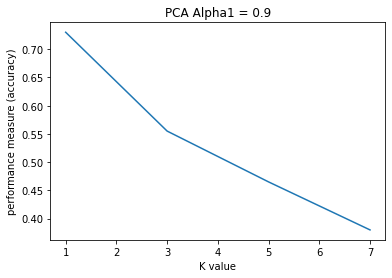

In [ ]:

# plotting the points 
plt.plot(x, y3)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.9')
  
# function to show the plot
plt.show()

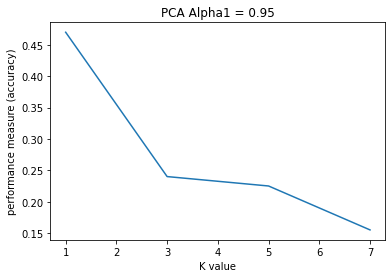

In [ ]:

# plotting the points 
plt.plot(x, y4)
  
# naming the x axis
plt.xlabel('K value')

# naming the y axis
plt.ylabel('performance measure (accuracy)')

# giving a title to my graph
plt.title('PCA Alpha1 = 0.95')
  
# function to show the plot
plt.show()

# LDA [Mohammed Aiman]